connect google drive with notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install openpyxl

In [1]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
!git config --global user.name "Pubudu-Piyankara"
!git config --global user.email "pubudupiyankara.me@gmail.com"

In [3]:
!git clone https://github.com/Pubudu-Piyankara/lakTravel_ML_Model.git


Cloning into 'lakTravel_ML_Model'...


In [14]:
!cp /Colab\ Notebooks/lakTravel.ipynb /content/lakTravel_ML_Model/


cp: cannot stat '/Colab Notebooks/lakTravel.ipynb': No such file or directory


In [3]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Source/all.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,Date,Temperature,Precipitation,Wind Speed
0,1/1/2019,24.2,0.0,2.3
1,2/1/2019,22.6,0.0,2.2
2,3/1/2019,23.3,0.0,3.1
3,4/1/2019,23.6,0.0,3.4
4,5/1/2019,23.2,0.0,3.7


In [4]:
df.dtypes

,0
Date,object
Temperature,float64
Precipitation,float64
Wind Speed,float64


In [5]:
df.shape

(1826, 4)

In [31]:
print(df.isnull().sum())

Date                 0
Temperature          0
Precipitation        0
Wind Speed           0
Year                 0
Month                0
DayOfWeek            0
IsWeekend            0
Temperature_Class    0
Rainfall_Class       0
Wind_Class           0
Weather_Situation    0
Day                  0
dtype: int64


In [6]:
df.isna().sum()

,0
Date,0
Temperature,0
Precipitation,0
Wind Speed,0


In [7]:
df1= df.dropna()
df1.isna().sum()

,0
Date,0
Temperature,0
Precipitation,0
Wind Speed,0


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1821,False
1822,False
1823,False
1824,False


In [9]:
df.drop_duplicates()

,Date,Temperature,Precipitation,Wind Speed
0,1/1/2019,24.2,0.0,2.3
1,2/1/2019,22.6,0.0,2.2
2,3/1/2019,23.3,0.0,3.1
3,4/1/2019,23.6,0.0,3.4
4,5/1/2019,23.2,0.0,3.7
...,...,...,...,...
1821,27/12/2023,24.3,28.3,2.3
1822,28/12/2023,23.3,12.4,1.4
1823,29/12/2023,23.0,10.9,1.4
1824,30/12/2023,23.9,23.8,1.4


In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Convert to datetime

In [28]:
# these features help the model learn the relationship between time and weather, allowing it to make better predictions!
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [29]:
df.head(20)

,Date,Temperature,Precipitation,Wind Speed,Year,Month,DayOfWeek,IsWeekend,Temperature_Class,Rainfall_Class,Wind_Class,Weather_Situation,Day
0,2019-01-01,24.2,0.0,2.3,2019,1,1,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,1
1,2019-01-02,22.6,0.0,2.2,2019,1,2,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,2
2,2019-01-03,23.3,0.0,3.1,2019,1,3,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,3
3,2019-01-04,23.6,0.0,3.4,2019,1,4,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,4
4,2019-01-05,23.2,0.0,3.7,2019,1,5,1,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,5
5,2019-01-06,23.6,0.0,1.9,2019,1,6,1,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,6
6,2019-01-07,24.1,0.0,0.5,2019,1,0,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,7
7,2019-01-08,23.6,0.0,3.0,2019,1,1,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,8
8,2019-01-09,25.0,0.0,3.1,2019,1,2,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,9
9,2019-01-10,24.3,0.0,2.8,2019,1,3,0,Comfortable,Heavy Rainfall,Light Winds,Comfortable_Heavy Rainfall_Light Winds,10


# **Data Visuliazation**
outliers

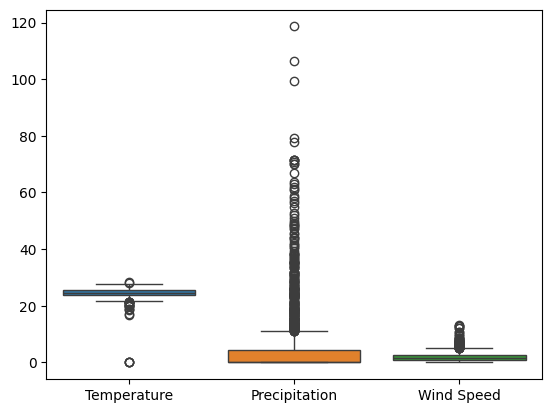

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[['Temperature', 'Precipitation', 'Wind Speed']])
plt.show()


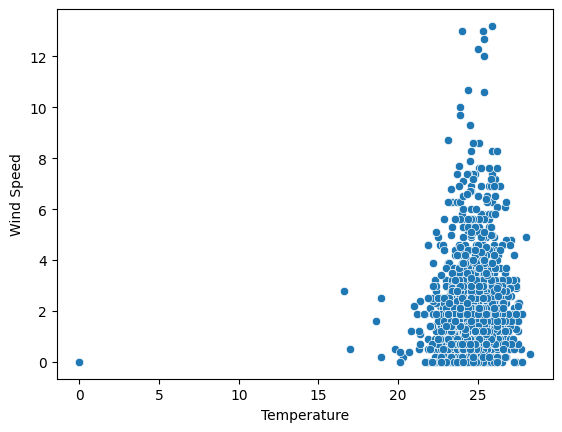

In [14]:
# Scatter plot
sns.scatterplot(x='Temperature', y='Wind Speed', data=df)
plt.show()

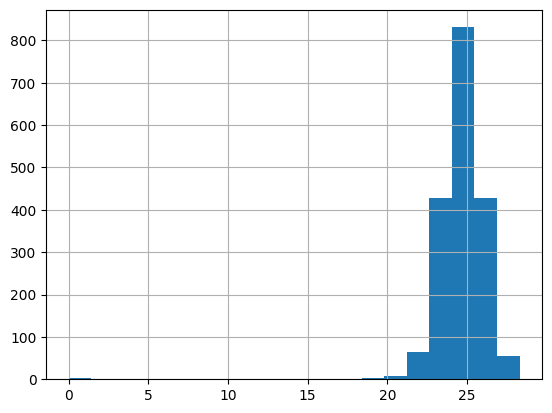

In [15]:
# Histrogram
df['Temperature'].hist(bins=20)
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [17]:


# Convert the Date column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [18]:
def classify_temperature(temp):
    if temp > 26:
        return 'Hot'
    elif 22 <= temp <= 26:
        return 'Comfortable'
    else:
        return 'Cool'

df['Temperature_Class'] = df['Temperature'].apply(classify_temperature)


In [19]:
# First, group the data by month and calculate total rainfall
df['Month'] = df['Date'].dt.month
monthly_rainfall = df.groupby('Month')['Precipitation'].sum().reset_index()

# Now classify the monthly rainfall
def classify_rainfall(rain):
    if rain > 200:
        return 'Heavy Rainfall'
    elif 100 <= rain <= 200:
        return 'Moderate Rainfall'
    else:
        return 'Light Rainfall'

monthly_rainfall['Rainfall_Class'] = monthly_rainfall['Precipitation'].apply(classify_rainfall)

# Merge the classified rainfall back into the original dataset
df = pd.merge(df, monthly_rainfall[['Month', 'Rainfall_Class']], on='Month', how='left')


In [20]:
def classify_wind_speed(wind_speed):
    if wind_speed > 15:
        return 'Strong Winds'
    elif 8 <= wind_speed <= 15:
        return 'Moderate Winds'
    else:
        return 'Light Winds'

df['Wind_Class'] = df['Wind Speed'].apply(classify_wind_speed)


In [21]:
# Combine temperature, rainfall, and wind conditions into a single category
df['Weather_Situation'] = df['Temperature_Class'] + '_' + df['Rainfall_Class'] + '_' + df['Wind_Class']


In [22]:
# Features
X = df[['Temperature', 'Precipitation', 'Wind Speed']]

# Labels (Combined Weather Situation)
y = df['Weather_Situation']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 90.44%
                                              precision    recall  f1-score   support

      Comfortable_Heavy Rainfall_Light Winds       0.93      0.96      0.95       285
   Comfortable_Heavy Rainfall_Moderate Winds       0.67      1.00      0.80         2
   Comfortable_Moderate Rainfall_Light Winds       0.00      0.00      0.00        22
Comfortable_Moderate Rainfall_Moderate Winds       0.00      0.00      0.00         1
             Cool_Heavy Rainfall_Light Winds       1.00      1.00      1.00         3
          Cool_Moderate Rainfall_Light Winds       1.00      1.00      1.00         1
              Hot_Heavy Rainfall_Light Winds       0.96      1.00      0.98        50
           Hot_Moderate Rainfall_Light Winds       0.00      0.00      0.00         2

                                    accuracy                           0.90       366
                                   macro avg       0.57      0.62      0.59       366
                                wei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Check temperature classification
print(df[['Temperature', 'Temperature_Class']].head(10))

# Check monthly rainfall classification
print(monthly_rainfall[['Month', 'Precipitation', 'Rainfall_Class']])

# Check wind speed classification
print(df[['Wind Speed', 'Wind_Class']].head(10))


   Temperature Temperature_Class
0         24.2       Comfortable
1         22.6       Comfortable
2         23.3       Comfortable
3         23.6       Comfortable
4         23.2       Comfortable
5         23.6       Comfortable
6         24.1       Comfortable
7         23.6       Comfortable
8         25.0       Comfortable
9         24.3       Comfortable
    Month  Precipitation     Rainfall_Class
0       1          342.2     Heavy Rainfall
1       2          181.1  Moderate Rainfall
2       3          272.7     Heavy Rainfall
3       4         1003.8     Heavy Rainfall
4       5          919.2     Heavy Rainfall
5       6          362.1     Heavy Rainfall
6       7          588.4     Heavy Rainfall
7       8          660.1     Heavy Rainfall
8       9          781.8     Heavy Rainfall
9      10         1651.3     Heavy Rainfall
10     11         1546.3     Heavy Rainfall
11     12         1073.4     Heavy Rainfall
   Wind Speed   Wind_Class
0         2.3  Light Winds
1         2

In [25]:
print(df[['Temperature_Class', 'Rainfall_Class', 'Wind_Class', 'Weather_Situation']].head(10))


  Temperature_Class  Rainfall_Class   Wind_Class  \
0       Comfortable  Heavy Rainfall  Light Winds   
1       Comfortable  Heavy Rainfall  Light Winds   
2       Comfortable  Heavy Rainfall  Light Winds   
3       Comfortable  Heavy Rainfall  Light Winds   
4       Comfortable  Heavy Rainfall  Light Winds   
5       Comfortable  Heavy Rainfall  Light Winds   
6       Comfortable  Heavy Rainfall  Light Winds   
7       Comfortable  Heavy Rainfall  Light Winds   
8       Comfortable  Heavy Rainfall  Light Winds   
9       Comfortable  Heavy Rainfall  Light Winds   

                        Weather_Situation  
0  Comfortable_Heavy Rainfall_Light Winds  
1  Comfortable_Heavy Rainfall_Light Winds  
2  Comfortable_Heavy Rainfall_Light Winds  
3  Comfortable_Heavy Rainfall_Light Winds  
4  Comfortable_Heavy Rainfall_Light Winds  
5  Comfortable_Heavy Rainfall_Light Winds  
6  Comfortable_Heavy Rainfall_Light Winds  
7  Comfortable_Heavy Rainfall_Light Winds  
8  Comfortable_Heavy Rainfall_L

In [26]:
# Check if the predictions match the actual values
print("Actual vs Predicted")
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Hot_Heavy Rainfall_Light Winds, Predicted: Hot_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
Actual: Comfortable_Heavy Rainfall_Light Winds, Predicted: Comfortable_Heavy Rainfall_Light Winds
